# **FIREWALL BREACH DETECTION**

In [2]:

# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:

# Load Dataset
dataset_path = "log2.csv"
df = pd.read_csv(dataset_path)
df

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [4]:
# Display basic information
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB
None


In [5]:
# Show first few rows
print(df.head())



   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10              9  
2 

In [6]:
df.shape

(65532, 12)

In [7]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64


In [8]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [9]:
# Check unique values in "Action"
print("\nUnique values in 'Action':\n", df["Action"].value_counts())




Unique values in 'Action':
 Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64


C:\Users\mrbgo\AppData\Local\Temp\ipykernel_8548\1592571541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Action"], palette="coolwarm")


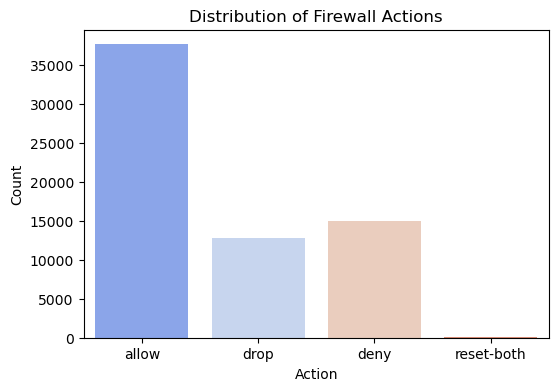

In [10]:
# Visualize "Action" distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Action"], palette="coolwarm")
plt.title("Distribution of Firewall Actions")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()



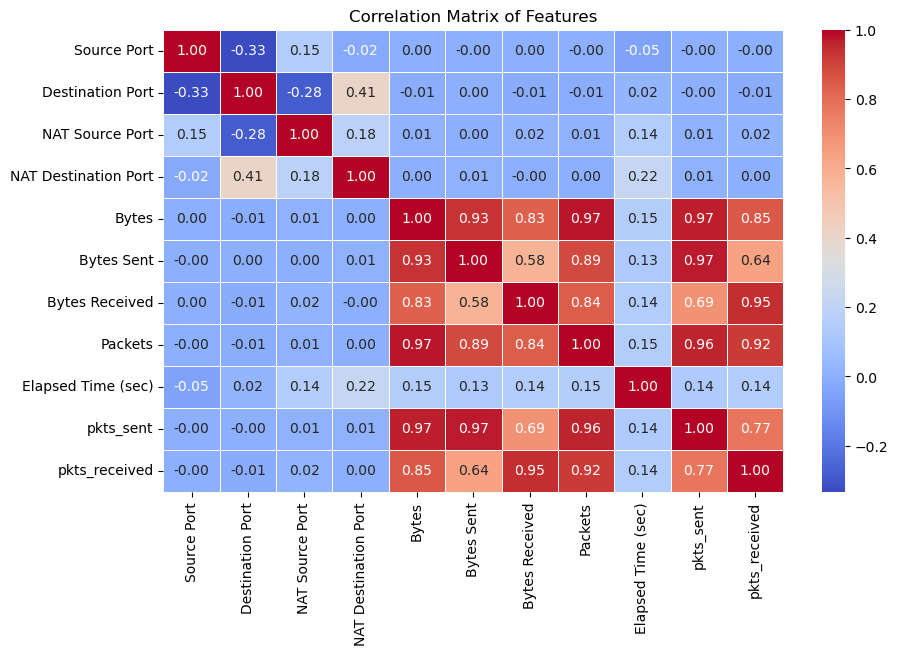

In [11]:
# Compute and plot correlation matrix
corr_matrix = df.drop(columns=["Action"]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()



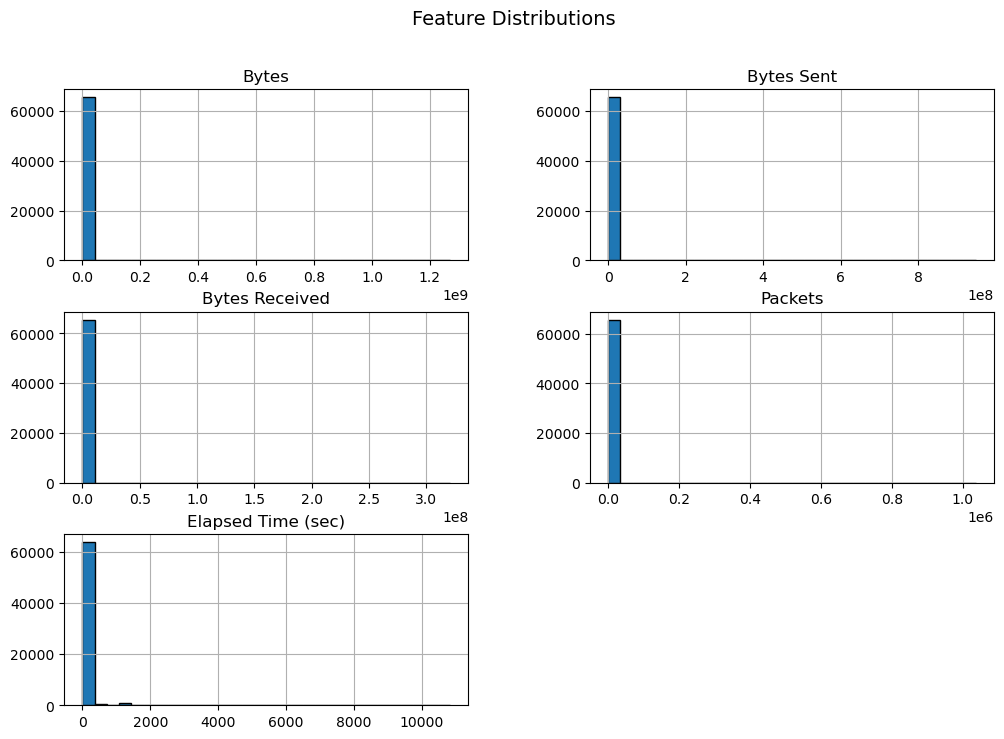

In [12]:
# Feature distributions
num_features = ["Bytes", "Bytes Sent", "Bytes Received", "Packets", "Elapsed Time (sec)"]
df[num_features].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()



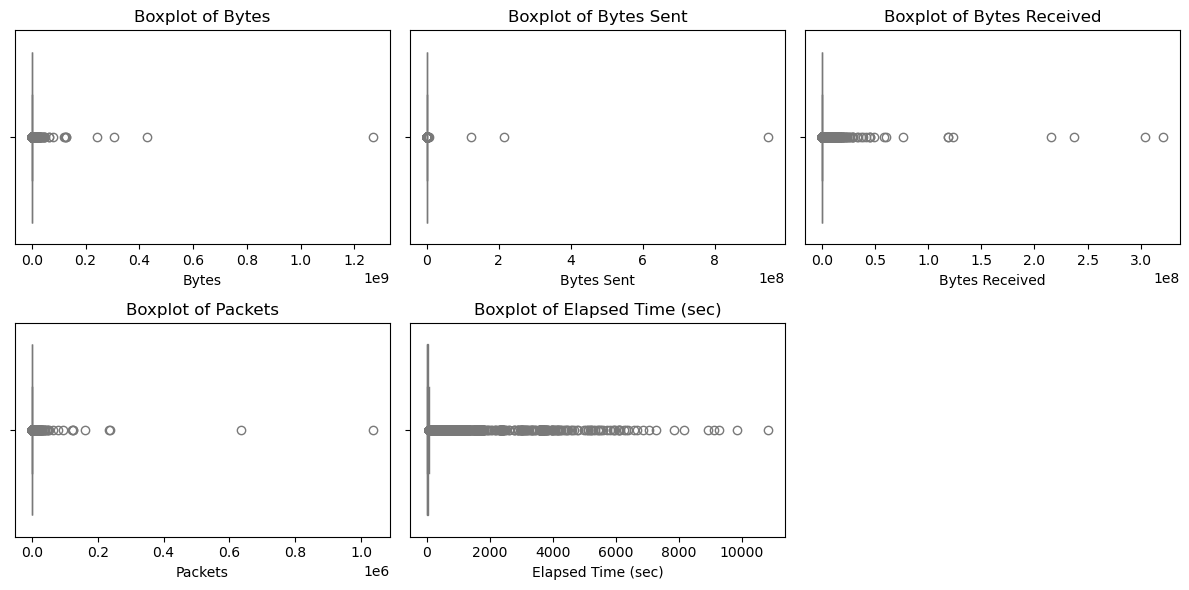

In [13]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color="lightblue")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()



In [14]:
# Apply outlier removal
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [15]:
# Apply outlier removal
df_cleaned = remove_outliers(df, num_features)

# Show new shape after outlier removal
print("\nDataset shape after outlier removal:", df_cleaned.shape)
df_cleaned.describe()



Dataset shape after outlier removal: (43104, 12)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,43104.000000,43104.000000,43104.000000,43104.000000,43104.000000,43104.000000,43104.000000,43104.00000,43104.000000,43104.000000,43104.000000
mean,49744.026680,13686.584470,11886.172258,2072.868574,109.005614,78.582127,30.423487,1.32635,9.271344,1.034568,0.291783
std,16048.495105,20229.441216,19484.314011,8907.306581,62.799114,20.198835,50.349716,0.48008,13.612730,0.192335,0.455200
min,0.000000,0.000000,0.000000,0.000000,60.000000,60.000000,0.000000,1.00000,0.000000,1.000000,0.000000
25%,49480.750000,53.000000,0.000000,0.000000,66.000000,66.000000,0.000000,1.00000,0.000000,1.000000,0.000000
50%,55081.000000,445.000000,0.000000,0.000000,70.000000,70.000000,0.000000,1.00000,0.000000,1.000000,0.000000
75%,59162.000000,25174.000000,20543.250000,53.000000,168.000000,94.000000,83.000000,2.00000,30.000000,1.000000,1.000000
max,65533.000000,65473.000000,65535.000000,65387.000000,369.000000,156.000000,225.000000,3.00000,64.000000,3.000000,2.000000


In [16]:
print("Class Distribution:\n", df["Action"].value_counts(normalize=True) * 100)


Class Distribution:
 Action
allow         57.437588
deny          22.869743
drop          19.610267
reset-both     0.082402
Name: proportion, dtype: float64


In [17]:
# Data Preprocessing
# Encode categorical target variable
label_encoder = LabelEncoder()
df["Action"] = label_encoder.fit_transform(df["Action"])



In [18]:
df_majority = df[df["Action"] == 0]  
df_minority1 = df[df["Action"] == 1]  
df_minority2 = df[df["Action"] == 2]  
df_minority3 = df[df["Action"] == 3]  

df_minority1_upsampled = resample(df_minority1, replace=True, n_samples=len(df_majority), random_state=42)
df_minority2_upsampled = resample(df_minority2, replace=True, n_samples=len(df_majority), random_state=42)
df_minority3_upsampled = resample(df_minority3, replace=True, n_samples=len(df_majority), random_state=42)

df_balanced_no_outliers = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled, df_minority3_upsampled])
df_balanced_no_outliers = df_balanced_no_outliers.sample(frac=1, random_state=42).reset_index(drop=True)

print("Dataset balanced successfully!")


Dataset balanced successfully!


In [19]:
# Display processed dataset
print("\nProcessed Dataset:\n", df_balanced_no_outliers.head())




Processed Dataset:
    Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        64461             31652                0                     0   
1        57338                80            37762                    80   
2        53251               443            19794                   443   
3        51788               445                0                     0   
4        48903             25773                0                     0   

   Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0       3     62          62               0        1                   0   
1       0   1420         715             705       12                  16   
2       0   5025         973            4052       19                  66   
3       2     70          70               0        1                   0   
4       3    157         157               0        1                   0   

   pkts_sent  pkts_received  
0          1              0  
1    

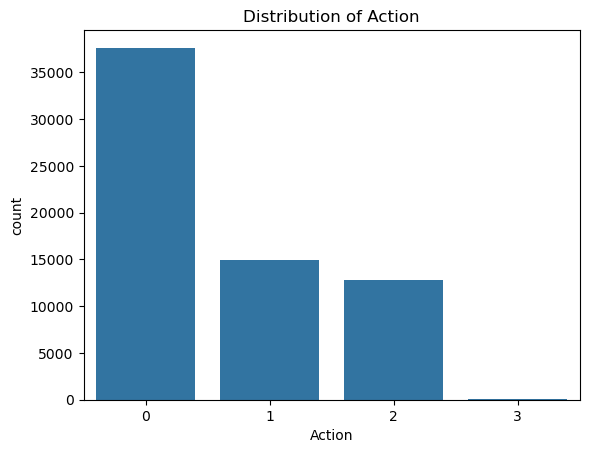

In [20]:
# Distribution of target variable
sns.countplot(x='Action', data=df)
plt.title('Distribution of Action')
plt.show()


In [21]:
X = df_balanced_no_outliers.drop(columns=["Action"])
y = df_balanced_no_outliers["Action"]


In [22]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train-test split completed!")


Train-test split completed!


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test) 
print("Feature scaling applied!")


Feature scaling applied!


In [24]:
# Model 1 - logistic regression

log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)


C:\Users\mrbgo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
logistic_acc = log_model.score(X_test_scaled, y_test)
print(f"Logistic Regression Accuracy: {logistic_acc:.4f}")


Logistic Regression Accuracy: 0.8287


In [26]:
y_pred=log_model.predict(X_test_scaled)
y_pred

array([2, 3, 0, ..., 3, 1, 1])

In [27]:
# MODEL-2
# Train Random Forest Model
optimized_rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
optimized_rf_model.fit(X_train_scaled, y_train)

print("Model trained successfully!")

Model trained successfully!


In [28]:

# Evaluate Model Performance
train_acc = optimized_rf_model.score(X_train_scaled, y_train)
test_acc = optimized_rf_model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9079
Test Accuracy: 0.9097


In [29]:
y_pred = optimized_rf_model.predict(X_test_scaled)
print(y_pred)
print(classification_report(y_test,y_pred))

[2 3 0 ... 3 1 3]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7528
           1       0.79      0.87      0.83      7528
           2       0.99      1.00      1.00      7528
           3       0.87      0.77      0.81      7528

    accuracy                           0.91     30112
   macro avg       0.91      0.91      0.91     30112
weighted avg       0.91      0.91      0.91     30112



In [30]:
# Suggest the best model based on test accuracy
if test_acc > logistic_acc:
    print("Random Forest is the better model.")
else:
    print("Logistic Regression is the better model.")

Random Forest is the better model.


In [31]:
from collections import Counter
print("Class Distribution:",Counter(y))

Class Distribution: Counter({3: 37640, 0: 37640, 2: 37640, 1: 37640})


<Axes: >

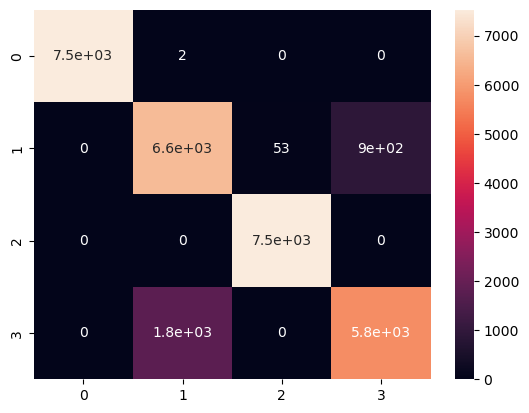

In [32]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True)


In [33]:
# Find misclassified samples
misclassified = np.where(y_test != y_pred)[0]

if len(misclassified) == 0:
    print("No misclassifications found!")
else:
    print(f"Misclassifications found: {len(misclassified)}")

Misclassifications found: 2719
